# DTSA 5509 Intro to Machine Learning - Supervised Learning Final Project <br>

### Project Title: Predicting Sleep Quality with Supervised Machine Learning Methods: A Case Study

Date: 2023 Oct 2 <br>
Author: Tsai-Yun Li <br>
Course Lecturer: Geena Kim <br>
Orginzation: University of Colorado Boulder <br>
Github repo URL of this project:

### I. Supervised Learning Problem Description
Before introducing the topic and goal of this project, I would like to address my motivation behind it. A friend of mine with chronic sleep disorder has been recording a few information about his sleep, intended as a reference for his doctor. I hope the machine learning techniques I have learned in this course can serve as an additional aid for him to acquire a better sleep quality, giving his very-subjective impression of his sleep issue a little scientific touch, as well as an interesting practice of problem-solving with data sciece.

In this project, I will view the prediction of sleep quality as a binary class classification task.
I will use my friend's daily sleep data to train and test 5 different supervised machine learning models that are commonly used to tackle binary class classifications, namely logistic regression, decision tree, adaboost, random forest, and support vector machine models. Then the model with the best performance will be selected to predict sleep quality with unseen data under similar conditions.

The questions I would like to answer via this project are: <br>
1. Which features are correlated? How?
2. Which features are important in the prediction of the subject's sleep quality? Why?
3. Which model, logistic regression, decision tree, adaboost, random forest, or support vector machine, turns out to be the best model for this binary class classification task? Why?
4. How well do the best-performing model predict the subject's sleep quality?

In [1]:
# importing and loading the data
import pandas as pd

sleepdata  = pd.read_csv('https://raw.githubusercontent.com/TsaiYunLi/ML1_Final_Project/main/JohnsonSleepData_labeled.csv')
print('data size =', sleepdata.shape)
sleepdata.head()

data size = (46, 14)


,Date,Day,Bedtime,Waketime,Sleep Length,Bedtime Temp,Perceived Temp,Dream,Wake Freq,Waked by Wife,Wife Nocturia,Sleep Quality Level,Slept Well,Meta Data
0,5/6/22,Fri,11:00 PM,7:00 AM,8:00,26.3,Fine,Forgot,1.0,Yes,No,5.0,1.0,NaN
1,5/7/22,Sat,1:00 AM,8:30 AM,7:30,26.3,Fine,Forgot,1.0,Unsure,Yes,7.0,1.0,NaN
2,5/8/22,Sun,11:20 PM,7:30 AM,8:10,26.5,Hot,Forgot,0.0,No,Yes,4.0,-1.0,Drank too much water at night; Stomach a bit u...
3,5/9/22,Mon,1:00 AM,7:20 AM,6:20,26.5,Fine,Forgot,0.0,No,Yes,3.0,-1.0,NaN
4,5/10/22,Tue,11:00 PM,8:20 AM,9:20,26.7,Cold,Forgot,1.0,Unsure,Yes,5.0,1.0,NaN


### II. Data Description and Data Cleaning
The sleep quality data is a tabulated dataset manually collected by the subject himself, intended as a reference for his doctor. I have got his full consent of using it in this public project.

As shown in the output above, the dataset contains 644 data points, which is made up of 46 rows for each day's sleep record, from 5 May 2022 to 20 June 2022, and 14 columns for 13 features that the subject believes might influence his sleep (not research based but purely out of his own sleep experience) and one added by myself to store the label 'Slept Well' indicating whether or not the subject slept well, i.e. 1 for positive and -1 for negative cases. 

The features in the dataset are:
1. Date (m/d/yy): the date when the sleep instance took place; <br>                 
2. Day (Mon ~ Sun): the day when the sleep instance took place; <br> 
3. Bedtime (hh:mm AM/PM): the time when the subject went to bed; <br>  
4. Waketime (hh:mm AM/PM): the time when the subject woke up; <br> 
5. Sleep Length (h:mm): the length of sleep the subject got; <br> 
6. Bedtime Temp (degree Celsius): the bedroom temperature at Bedtime; <br>
Note that the bedroom was always air-conditioned at 26 degree Celsius. 'Bedtime Temp' is the measured before the air-conditioner was turned on. <br> 
7. Perceived Temp (Fine/Hot/Cold): how the subject physically felt about the bedroom temperature at Bedtime; <br> 
8. Dream (Forgot/Remeber/Unsure): wheteher or not the subject remember any dream at Waketime; <br>
9. Wake Freq (times): number of times the subject woke up during sleep; <br>
10. Waked by Wife (Yes/No/Unsure): whether or not the subject was waked by his wife during sleep; <br>
11. Wife Nocturia (Yes/No): whether or not the subject's wife experienced nocturia; <br>
12. Sleep Quality Level (0~10): how the subject self-evaluated his sleep qualtiy according to how fatigue he felt at Waketime, which is a 0 to 10 scale with 0 as the lowest score and 10 the highest; <br>
13. Slept Well (1, -1): the label of each record; <br>
I labelled the records with sleep quality level 5 to 9 as 1, i.e. positive, and sleep quality level 0 to 4 as -1, i.e. negative. Note that the subject never experienced a sleep quality level of 10. <br>
14. Meta Data: additional qualitative information about the sleep that the subject thought might had an influence on his sleep experience <br>

In the following code sections, I will explore the dataset in detail to check for and handle useless data and missing data (null values). Then, when necessary, I will convert some features to other data types and/or normalize them into the scales more suitable for modeling.

In [2]:
# checking for null values and each feature's data type
sleepdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 46 non-null     object 
 1   Day                  46 non-null     object 
 2   Bedtime              41 non-null     object 
 3   Waketime             41 non-null     object 
 4   Sleep Length         41 non-null     object 
 5   Bedtime Temp         41 non-null     float64
 6   Perceived Temp       41 non-null     object 
 7   Dream                41 non-null     object 
 8   Wake Freq            41 non-null     float64
 9   Waked by Wife        41 non-null     object 
 10  Wife Nocturia        41 non-null     object 
 11  Sleep Quality Level  41 non-null     float64
 12  Slept Well           41 non-null     float64
 13  Meta Data            16 non-null     object 
dtypes: float64(4), object(10)
memory usage: 5.2+ KB


In [3]:
# checking for each column's null values
print("column name, number of null values in each column before data cleaning:")
sleepdata.isna().sum()

column name, number of null values in each column before data cleaning:


Date                    0
Day                     0
Bedtime                 5
Waketime                5
Sleep Length            5
Bedtime Temp            5
Perceived Temp          5
Dream                   5
Wake Freq               5
Waked by Wife           5
Wife Nocturia           5
Sleep Quality Level     5
Slept Well              5
Meta Data              30
dtype: int64

In [4]:
# checking for each row's null values
print("row index, number of null values in each row before data cleaning:")
sleepdata.isna().sum(axis=1)

row index, number of null values in each row before data cleaning:


0      1
1      1
2      0
3      1
4      1
5      0
6     12
7     12
8     12
9      0
10     0
11     0
12     1
13     1
14     1
15     1
16     0
17     1
18     1
19     1
20     1
21    12
22     1
23     1
24     1
25     0
26     0
27     1
28     0
29     0
30     1
31     1
32     0
33    12
34     1
35     1
36     0
37     0
38     1
39     0
40     1
41     0
42     1
43     1
44     0
45     1
dtype: int64

From the output above, we can tell that except the first two columns, there are null values in the rest of the columns. Most features are objects, except for 'Bedtime Temp', 'Wake Freq', 'Sleep Quality Level', and 'Slept Well'.

Firstly, I decide to drop the column for 'Meta Data,' not only because it contains many null values but also for the fact that I am not going refer to it in my analysis. Secondly, since all the null values are in the same 5 rows, which takes up only 11% of the data, I will drop these rows. Then I will perform some data type convertions.

In [5]:
print("original dataset shape:", sleepdata.shape)
## removing specific data
# dropping 'Meta Data'
sleepdata = sleepdata.drop('Meta Data', axis=1)

# dropping the 5 rows with null values
sleepdata = sleepdata.dropna()

## encoding categorical features
# substituting 'Day' values (Mon, Tues, Wed, Thurs, Fri, Sat, Sun) with number (1, 2, 3, 4, 5, 6, 7)
weekday_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thurs': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
sleepdata['Day'] = sleepdata['Day'].map(weekday_mapping).astype(float)

# transforming the 'Bedtime' values from temporal format into numbers
# e.g. from 10:30 PM to 20.5; from 11:00 PM to 23.0; from 12:00 AM to 24.0; from 1:00 AM to 25.0
bedtime_numbers = []
nonNA_Bedtime = sleepdata['Bedtime'].notna()
for t in sleepdata['Bedtime'][nonNA_Bedtime]:
    time_parts = t.split(' ')
    hour, minute = map(int, time_parts[0].split(':'))
    if time_parts[1] == 'PM' and hour <= 11:
        hour += 12
    if time_parts[1] == 'AM' and hour == 12:
        hour += 12
    if time_parts[1] == 'AM' and 1 <= hour < 12:
        hour += 24
    fractional_hour = hour + minute / 60.0
    bedtime_numbers.append(fractional_hour)
sleepdata.loc[nonNA_Bedtime, 'Bedtime'] = bedtime_numbers

# transforming the 'Waketime' values from temporal format into numbers
# e.g. from 9:00 AM to 9.0, from 9:30 AM to 9.5
waketime_numbers = []
nonNA_Waketime = sleepdata['Waketime'].notna()
for t in sleepdata['Waketime'][nonNA_Waketime]:
    time_parts = t.split(' ')
    hour, minute = map(int, time_parts[0].split(':'))
    fractional_hour = hour + minute / 60.0
    waketime_numbers.append(fractional_hour)
sleepdata.loc[nonNA_Waketime, 'Waketime'] = waketime_numbers

# transforming the 'Sleep Length' values from temporal format into numbers
# e.g. from 8:00 to 8, from 7:30 to 7.5
sleeplength_numbers = []
nonNA_SleepLength = sleepdata['Sleep Length'].notna()
for t in sleepdata['Sleep Length'][nonNA_SleepLength]:
    time_parts = t.split(' ')
    hour, minute = map(int, time_parts[0].split(':'))
    fractional_hour = hour + minute / 60.0
    sleeplength_numbers.append(fractional_hour)
sleepdata.loc[nonNA_SleepLength, 'Sleep Length'] = sleeplength_numbers

# converting the categorical 'Perceived Temp' from categorical to numerical data
# substituting (Cold, Hot, Fine) with (1, 2, 3)
perctemp_mapping = {'Cold': 1, 'Hot': 2, 'Fine': 3}
sleepdata['Perceived Temp'] = sleepdata['Perceived Temp'].map(perctemp_mapping).astype(float)

# converting the categorical 'Dream' from categorical to numerical data
# substituting (Remember, Forgot) with (1, 2)
dream_mapping = {'Remember': 1, 'Forgot': 2}
sleepdata['Dream'] = sleepdata['Dream'].map(dream_mapping).astype(float)

# converting the categorical 'Waked by Wife' from categorical to numerical data
# substituting (Unsure, Yes, No) with (1, 2, 3)
wbf_mapping = {'Unsure': 1, 'Yes': 2, 'No': 3}
sleepdata['Waked by Wife'] = sleepdata['Waked by Wife'].map(wbf_mapping).astype(float)

# converting the categorical 'Wife Nocturia' from categorical to numerical data
# substituting (Yes, No) with (1, 2)
wn_mapping = {'Yes': 1, 'No': 2}
sleepdata['Wife Nocturia'] = sleepdata['Wife Nocturia'].map(wn_mapping).astype(float)

print("dataset shape after the data cleaning above:", sleepdata.shape)

original dataset shape: (46, 14)
dataset shape after the data cleaning above: (41, 13)


In [6]:
## double checking if all the null values are eliminated
# checking for each column's null values
print("column name, number of null values in each column after data cleaning:", sleepdata.isna().sum(), "\n")

# checking for each row's null values
print("row index, number of null values in each row after data cleaning:", sleepdata.isna().sum(axis=1))

column name, number of null values in each column after data cleaning: Date                   0
Day                    0
Bedtime                0
Waketime               0
Sleep Length           0
Bedtime Temp           0
Perceived Temp         0
Dream                  0
Wake Freq              0
Waked by Wife          0
Wife Nocturia          0
Sleep Quality Level    0
Slept Well             0
dtype: int64 

row index, number of null values in each row after data cleaning: 0     0
1     0
2     0
3     0
4     0
5     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
dtype: int64


In [7]:
print("data head after data cleaning:")
sleepdata.head()

data head after data cleaning:


,Date,Day,Bedtime,Waketime,Sleep Length,Bedtime Temp,Perceived Temp,Dream,Wake Freq,Waked by Wife,Wife Nocturia,Sleep Quality Level,Slept Well
0,5/6/22,5.0,23.000000,7.000000,8.000000,26.3,3.0,2.0,1.0,2.0,2.0,5.0,1.0
1,5/7/22,6.0,25.000000,8.500000,7.500000,26.3,3.0,2.0,1.0,1.0,1.0,7.0,1.0
2,5/8/22,7.0,23.333333,7.500000,8.166667,26.5,2.0,2.0,0.0,3.0,1.0,4.0,-1.0
3,5/9/22,1.0,25.000000,7.333333,6.333333,26.5,3.0,2.0,0.0,3.0,1.0,3.0,-1.0
4,5/10/22,2.0,23.000000,8.333333,9.333333,26.7,1.0,2.0,1.0,1.0,1.0,5.0,1.0


In [8]:
print("data info after data cleaning:")
sleepdata.info()

data info after data cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 45
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 41 non-null     object 
 1   Day                  41 non-null     float64
 2   Bedtime              41 non-null     float64
 3   Waketime             41 non-null     float64
 4   Sleep Length         41 non-null     float64
 5   Bedtime Temp         41 non-null     float64
 6   Perceived Temp       41 non-null     float64
 7   Dream                41 non-null     float64
 8   Wake Freq            41 non-null     float64
 9   Waked by Wife        41 non-null     float64
 10  Wife Nocturia        41 non-null     float64
 11  Sleep Quality Level  41 non-null     float64
 12  Slept Well           41 non-null     float64
dtypes: float64(12), object(1)
memory usage: 4.5+ KB


In [9]:
print("data shape after data cleaning:")
sleepdata.shape

data shape after data cleaning:


(41, 13)

##### Data cleaning summary:

1. one useless column 'Meta Data'and 5 rows of of data full of null values are removed;<br>
2. no useless or missing data left;<br>
3. contains 13 features, only 'Date' remains as a string object, others are all converted into float64 numerical items for the convenience of further statistical/graphical analysis and modelling;<br>
4. contains 41 rows and 13 columns

##### Data cleaning discussion: 
I have scaled categorical variables 'Bedtime,' 'Waketime', and 'Sleep Length' according to common units of time; however, for other categorical variables 'Perceived Temp,' 'Dream, 'Waked by Wife,' and 'Wife Nocturia,' I converted them into integers like 1, 2, 3, without domain research and meaningful context, only serving the purpose of differentiating conditions. On the one hand, this could cause problems if we want to analyze their weights, which I did not attempt to in this project. On the other hand, it could provide another layer of analysis if we know and use their weights instead.

### III. Exporatory Data Analysis

In this section, I will explore the dataset further and prepare it ready for modelling. First, I will compute simple summary statistics and graph the distribution of the features to get an impression of the main characteristics and patterns of the data. Then check for and handle outliers and correlated features to reduce overfitting. Finally, I will find out if the dataset is balanced or not, which would influence my choice of model evaltion metrics later.

In [10]:
## getting a rough statistic idea of the features
# simple statistics of each feature
sleepdata.describe()

,Day,Bedtime,Waketime,Sleep Length,Bedtime Temp,Perceived Temp,Dream,Wake Freq,Waked by Wife,Wife Nocturia,Sleep Quality Level,Slept Well
count,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,4.000000,23.654472,7.928862,8.274390,27.60000,2.512195,1.926829,0.439024,2.682927,1.097561,4.170732,0.024390
std,2.144761,0.886935,0.688083,1.035187,1.44931,0.840296,0.263652,1.073517,0.609878,0.300406,2.143624,1.012122
min,1.000000,22.000000,6.000000,5.166667,25.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000
25%,2.000000,23.000000,7.500000,7.833333,26.30000,2.000000,2.000000,0.000000,3.000000,1.000000,3.000000,-1.000000
50%,4.000000,23.500000,8.000000,8.500000,27.30000,3.000000,2.000000,0.000000,3.000000,1.000000,5.000000,1.000000
75%,6.000000,24.166667,8.500000,9.000000,29.00000,3.000000,2.000000,1.000000,3.000000,1.000000,5.000000,1.000000
max,7.000000,26.333333,9.166667,9.916667,30.10000,3.000000,2.000000,6.000000,3.000000,2.000000,9.000000,1.000000


In [11]:
# mode of numerical items converted from categorical values
PT_mode = sleepdata['Perceived Temp'].mode().iloc[0]
Dr_mode = sleepdata['Dream'].mode().iloc[0]
WbW_mode = sleepdata['Waked by Wife'].mode().iloc[0]
WN_mode = sleepdata['Wife Nocturia'].mode().iloc[0]
SW_mode = sleepdata['Slept Well'].mode().iloc[0]
print("mode of Perceived Temp =", PT_mode)
print("mode of Dream =", Dr_mode)
print("mode of Waked by Wife =", WbW_mode)
print("mode of Wife Nocturia =", WN_mode)
print("mode of Slept Well =", SW_mode)

mode of Perceived Temp = 3.0
mode of Dream = 2.0
mode of Waked by Wife = 3.0
mode of Wife Nocturia = 1.0
mode of Slept Well = 1.0


##### The mean of each feature and their contextual interpretation:
1. Day (4.00): Thurs; <br>
2. Bedtime (23.65): 11:39 PM; <br>
3. Waketime (7.93): 7:56 AM; <br>
4. Sleep Length (8.27): 8 hours 16 minutes; <br>
5. Bedtime Temp (27.60): 27.6 degree Celsius; <br>
6. Perceived Temp (2.51): not meaningful in context; <br>
7. Dream (1.93): not meaningful; <br>
8. Wake Freq (0.44): 44% of the times of sleep; <br>
9. Waked by Wife (2.68): not meaningful in context; <br>
10. Wife Nocturia (1.10): not meaningful in context; <br>
11. Sleep Quality Level (4.17): level 4; <br>
12. Slept Well (0.02): not meaningful in context <br>
These are the average of all the features.

##### The mode of "categorically labelled" features and their contextual interpretation:
1. Perceived Temp (3): Fine; <br>
2. Dream (2): Forgot; <br>
3. Waked by Wife (3): No; <br>
4. Wife Nocturia(1): Yes; <br>
5. Slept Well (1): positive <br>
These are the most frequent items of the 5 features above.

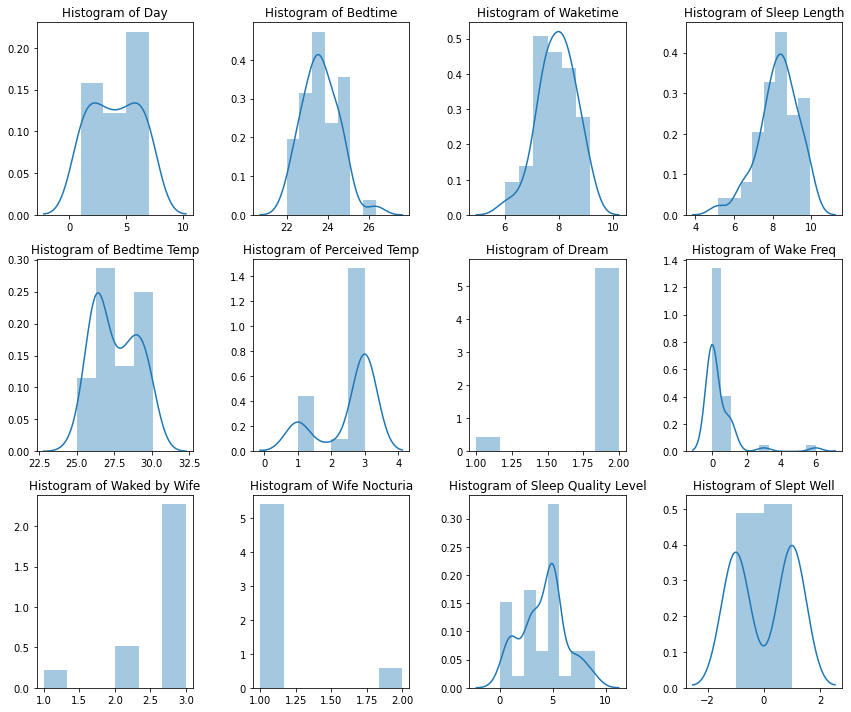

In [12]:
## understanding the distribution of the features
# creating a histogram (3x4 grid) for the distribution of each feature (excluding 'Date')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 4, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(sleepdata.columns[1:], 1):
    ax = axes[i - 1] #skips the first column 'Date'
    sns.distplot(sleepdata[feature], ax=ax, kde=True)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

##### The shape of each feature's distribution:
From the histograms above, we can tell that:
1. features with a roughly bell-shaped distribution (i.e. roughly normally distributed): 'Bedtime,' 'Waketime,' 'Sleep Length,' and 'Sleep Quality Level,' indicating a rather even distribution around the average of the distribution, which is good

2. feature with an apparently right-skewed distribution: 'Wake Freq,' indicating that the majority of its value is rather small; that is, the subject was not frequently waked by his wife during his sleep

3. features with a roughly m-shaped/bimodal distribution: 'Day,' and 'Bedtime Temp,' indicating that these two features are more or less concentrated in two modes

Note that the distribution graphs are not meaningful for numerical features converted from categorical objects, since their values only serve as "labels" but not their weights, including graphs for 'Percieved Temp,' 'Dream,' 'Waked by Wife,' 'Wife Nocturia,' and 'Slept Well.'

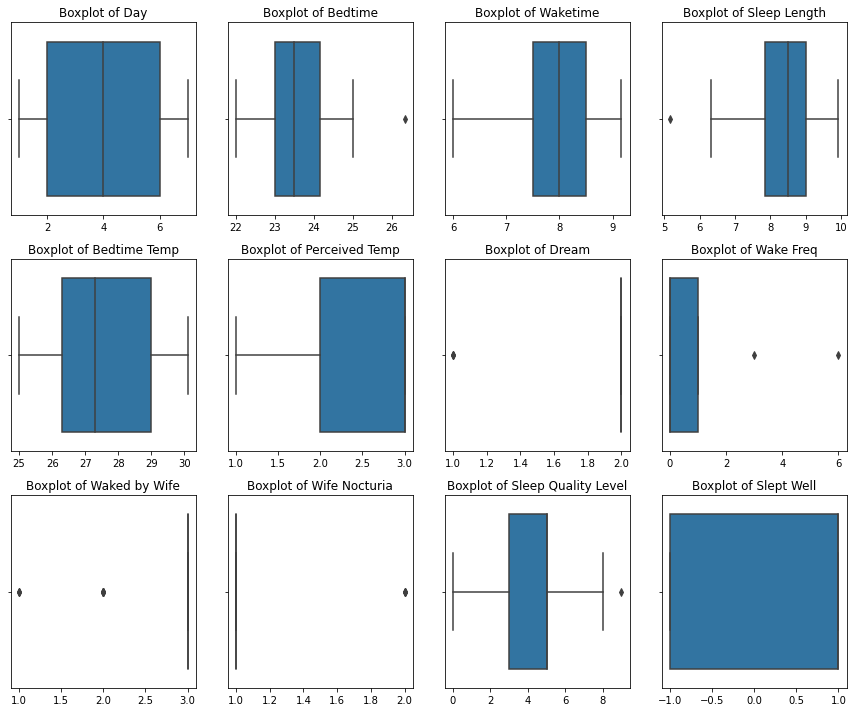

In [13]:
## checking for outliers
# creating a boxplot (3x4 grid) for the distribution of each feature (excluding 'Date')
fig, axes = plt.subplots(3, 4, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(sleepdata.columns[1:], 1):
    ax = axes[i - 1] #skips the first column 'Date'
    sns.boxplot(data=sleepdata, x=feature, ax=ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

##### Found Outliers: 
From thhe boxplots above, we can tell that there are outliers in the data in the following features:
1. 'Bedtime': outliers are values > 26; <br>
2. 'Sleep Length': outliers are values < 6; <br>
3. 'Sleep Quality Level': outliers are values > 8

I will locate the rows with the outliers for each of these features to inspect them in context and then decide how to handle them. 

In [14]:
# locating the outliers
BT_above_26 = sleepdata['Bedtime'] > 26
BT_outliers = sleepdata[BT_above_26]
print("Bedtime outlier row:", BT_outliers, "\n")

SL_under_6 = sleepdata['Sleep Length'] < 6
SL_outliers = sleepdata[SL_under_6]
print("Sleep Length outlier row:", SL_outliers, "\n")

SqL_above_8 = sleepdata['Sleep Quality Level'] > 8
SqL_outliers = sleepdata[SqL_above_8]
print("Sleep Quality Level outlier row:", SqL_outliers)

Bedtime outlier row:        Date  Day    Bedtime  Waketime  Sleep Length  Bedtime Temp  \
44  6/19/22  7.0  26.333333       7.5      5.166667          29.8   

    Perceived Temp  Dream  Wake Freq  Waked by Wife  Wife Nocturia  \
44             1.0    2.0        0.0            3.0            1.0   

    Sleep Quality Level  Slept Well  
44                  5.0         1.0   

Sleep Length outlier row:        Date  Day    Bedtime  Waketime  Sleep Length  Bedtime Temp  \
44  6/19/22  7.0  26.333333       7.5      5.166667          29.8   

    Perceived Temp  Dream  Wake Freq  Waked by Wife  Wife Nocturia  \
44             1.0    2.0        0.0            3.0            1.0   

    Sleep Quality Level  Slept Well  
44                  5.0         1.0   

Sleep Quality Level outlier row:        Date  Day  Bedtime  Waketime  Sleep Length  Bedtime Temp  \
11  5/17/22  2.0     22.5  8.333333      9.833333          25.0   

    Perceived Temp  Dream  Wake Freq  Waked by Wife  Wife Nocturia  \

In [15]:
## handling outliers of Bedtime and Sleep Length
# removing record for date 6/19/22
print("number of rows before removing this row:", len(sleepdata))
outlier_row = (sleepdata['Date'] == '6/19/22')
sleepdata = sleepdata[~outlier_row]
print("number of rows after removing this row:", len(sleepdata))

number of rows before removing this row: 41
number of rows after removing this row: 40


##### Handled the Outliers:
After close inspection of the outliers, I discarded the row with sleep record for 'Date' 6/19/22, because it contains both the outliers of features 'Bedtime' and 'Sleep Length,' indicating that it deviates from an average night's sleep experience too much to be considered in the data. However, I
did not discard the row with sleep record for 'Date' 5/17/22, since this 'Sleep Quality Level' outlier with value 9 is an output vairable, not an input vairable, which would influence data balance if removed.

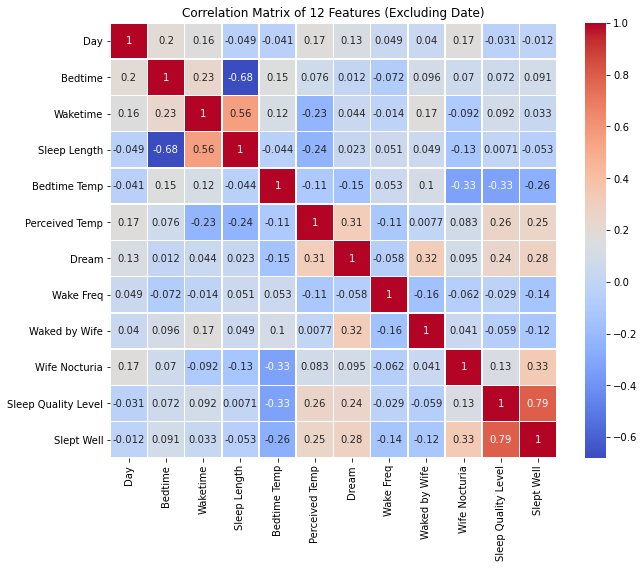

In [16]:
## checking for multicollinearity
# creating a heatmap for the correlation matrix of the features (excluding 'Date')
subset = sleepdata.iloc[:, 1:]  #skips the first column 'Date'
corr_matrix = subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of 12 Features (Excluding Date)')
plt.show()

In [17]:
## handling multicollinearity
# removing feature 'SLeep Length'
sleepdata = sleepdata.drop('Sleep Length', axis=1)

# removing feature 'Sleep Quality Level'
sleepdata = sleepdata.drop('Sleep Quality Level', axis=1)

##### Found and Handled Multicollinearity:

Multicollinearity is found from the correlation matrix above:
1. features that exhibit a relatively strong, positive, linear correlation: <br>
'Waketime' and 'Sleep Length' (0.53), which is reasonable and expected, because 'Sleep Length' was a linear combination of 'Waketime' and 'Bedtime'; <br>
'Sleep Quality Level' and 'Slept Well' (0.79), which is also resonable and expected, since 'Slept Well' is the label converted according to 'Sleep Quality Level' as mentioned in the data description section. <br>

2. features that exhibit a relatively strong, negative, linear correlation: <br>
'Bedtime' and 'Sleep Length' (-0.75), which is reasonable and expected as well, because 'Sleep Length' was a linear combination of 'Waketime' and 'Bedtime.' <br>

Therefore I handled the issue of multicollinearity by removing 'Sleep Length,' the feature relatively strongly correlated with both 'Bedtime' and 'Waketime. I also removed the feature 'Sleep Quality Level,' because it is the score from which the prediction label 'Slept Well' is converted. As for the feature 'Slept Well', I did not remove it but only include it in the output y dataset, seperated from the input X dataset.

number of samples for each class: -1.0    20
 1.0    20
Name: Slept Well, dtype: int64
class ratios: -1.0    0.5
 1.0    0.5
Name: Slept Well, dtype: float64


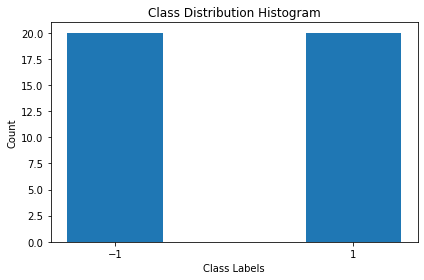

In [18]:
## checking if the dataset is balanced or imbalanced
# computing number of samples for each class and class ratio
class_labels = sleepdata.iloc[:, -1]
class_counts = class_labels.value_counts()
class_ratios = class_counts/class_counts.sum()
print("number of samples for each class:", class_counts)
print("class ratios:", class_ratios)

# creating class distribution histogram
class_labels = sleepdata.iloc[:, -1]
class_counts = class_labels.value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Class Distribution Histogram')
plt.xticks([-1, 1]) 
plt.tight_layout()

##### Balanced Data:
From the computed class count (-1 with 20 instances and 1 with 20 instances for a total of 40 instances) and the 50-50 class ratio, we can tell that this dataset is perfectly balanced.

In [19]:
# summary statistics of the finalized dataset
print("data info after EDA:")
sleepdata.info()

data info after EDA:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 45
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            40 non-null     object 
 1   Day             40 non-null     float64
 2   Bedtime         40 non-null     float64
 3   Waketime        40 non-null     float64
 4   Bedtime Temp    40 non-null     float64
 5   Perceived Temp  40 non-null     float64
 6   Dream           40 non-null     float64
 7   Wake Freq       40 non-null     float64
 8   Waked by Wife   40 non-null     float64
 9   Wife Nocturia   40 non-null     float64
 10  Slept Well      40 non-null     float64
dtypes: float64(10), object(1)
memory usage: 3.8+ KB


In [20]:
print("data shape after EDA:")
sleepdata.shape

data shape after EDA:


(40, 11)

##### EDA summary:

1. computed feature simple statistics; <br>
2. graphed feature distribution: Note that 'Wake Freq' is right-skewed, which visualized the fact that the majority of its values is small;<br>
3. removed outliers: removed row for 'Date' 6/19/22; <br>
4. found correlated features: 'Waketime' and 'Sleep Length' (0.53), 'Bedtime' and 'Sleep Length' (-0.75), 'Sleep Quality Level' and 'SLept Well' (0.79); <br>
5. handled multicolinearity: removed 'Sleep Length' an 'Sleep Quality Level'; <br>
6. confirmed data balance condition: perfectly balanced with 50-50 class ratio; <br>
7. finalized dataset data shape: 40 rows * 11 columns; <br>
8. finalized feature selection: <br>
one feature for the referece of each sleep instance: 'Date'<br>
nine features as the input variable X: 'Day,' 'Bedtime,' 'Waketime,' 'Bedtime Temp,' 'Perceived Temp,' 'Dream,' 'Wake Freq,' 'Waked by Wife,' and 'Wife Nocturia' <br>
one feature as the output variable y (i.e. the prediction label): 'Slept Well' <br>

##### EDA discussion: 

Removing correlated features resulted in a relatively large decrease in data size, from 41 * 13 = 533 (after data cleaning) to 40 * 11 = 440 data points (after EDA). It might be better if I apply other techniques to mitigate the influence of multicollinearity without removing so much data. I would do some research about this issue next time.

### IV. Analysis: Model Building, Training, and Testing

In this section, I will build five commonly used supervised machine learning models, namely logistic regression, decision tree, adaboost, random forest, and support vector machine models. Then I will try to optimize their performance by doing hyperparameter tuning and gridsearch to find their best parameters. The models will be trained using the training dataset X_train and further tested using the test dataset y_test. Feature importance will also be addressed. Since the dataset is perfectly balanced, I do not need to apply techniques to deal with data imbalance.

##### Data Splitting:
I decided to follow the custom and perform a 80-20 split of the dataset: <br>
input variable X (80% of the original dataset, i.e., 32 rows): values of nine features, namely 'Day,' 'Bedtime,' 'Waketime,' 'Bedtime Temp,' 'Perceived Temp,' 'Dream,' 'Wake Freq,' 'Waked by Wife,' and 'Wife Nocturia;' <br>
output variable y (20% of the original dataset, i.e., 8 rows): values of one feature, 'Slept Well'

In [21]:
# split the dataset into a training set (80%) and a testing set (20%) 
from sklearn.model_selection import train_test_split
X = sleepdata.iloc[:, 1:-1].values # omits 'Date' and Slept Well'
y = sleepdata.iloc[:, -1].values #only contains 'Slept Well', the last column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

print("data shape:", sleepdata.shape, "\n")
print("X_train shape:", X_train.shape, " X_train datatype:", type(X_train))
print("X_test shape:", X_test.shape, " y_train datatype:", type(y_train))
print("y_train shape:", y_train.shape, " X_test datatype:", type(X_test))
print("y_test shape:", y_test.shape, " y_test datatype:", type(y_test))

data shape: (40, 11) 

X_train shape: (32, 9)  X_train datatype: <class 'numpy.ndarray'>
X_test shape: (8, 9)  y_train datatype: <class 'numpy.ndarray'>
y_train shape: (32,)  X_test datatype: <class 'numpy.ndarray'>
y_test shape: (8,)  y_test datatype: <class 'numpy.ndarray'>


In [22]:
# double checks X
X = sleepdata.iloc[:, 1:-2]
print(X)

    Day    Bedtime  Waketime  Bedtime Temp  Perceived Temp  Dream  Wake Freq  \
0   5.0  23.000000  7.000000          26.3             3.0    2.0        1.0   
1   6.0  25.000000  8.500000          26.3             3.0    2.0        1.0   
2   7.0  23.333333  7.500000          26.5             2.0    2.0        0.0   
3   1.0  25.000000  7.333333          26.5             3.0    2.0        0.0   
4   2.0  23.000000  8.333333          26.7             1.0    2.0        1.0   
5   3.0  23.000000  7.500000          27.3             3.0    2.0        6.0   
9   7.0  22.666667  8.583333          26.3             3.0    2.0        0.0   
10  1.0  23.166667  8.000000          25.8             1.0    2.0        0.0   
11  2.0  22.500000  8.333333          25.0             3.0    2.0        0.0   
12  3.0  23.500000  8.000000          26.3             1.0    2.0        0.0   
13  4.0  24.000000  6.500000          26.1             2.0    2.0        0.0   
14  5.0  24.000000  8.500000          26

In [23]:
# double checks y
y = sleepdata.iloc[:, -1]
print(y)

0     1.0
1     1.0
2    -1.0
3    -1.0
4     1.0
5    -1.0
9     1.0
10    1.0
11    1.0
12   -1.0
13    1.0
14    1.0
15    1.0
16   -1.0
17   -1.0
18   -1.0
19   -1.0
20    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26   -1.0
27    1.0
28    1.0
29   -1.0
30   -1.0
31    1.0
32    1.0
34    1.0
35   -1.0
36   -1.0
37   -1.0
38   -1.0
39   -1.0
40   -1.0
41    1.0
42   -1.0
43   -1.0
45   -1.0
Name: Slept Well, dtype: float64


#### 1. Logistic Regression Model

In [24]:
# build and train a logistic regression model
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(random_state=1234)
print(LG)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [25]:
# logistic regression hyperparameter tuning
# 5-fold cross-validation: GridSearch
# assess model performance for different hyperparameter combinations

from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],             #regularization parameter
    'penalty': ['l1', 'l2'],       #penalty (L1 or L2 regularization)
    'solver': ['liblinear', 'lbfgs']  #solver for optimization
}
grid_search = GridSearchCV(estimator=LG, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
LG_best_params = grid_search.best_params_
LG_best_model = grid_search.best_estimator_
print("LG_best_params:", LG_best_params, "\n")
print("LG_best_model:", LG_best_model)

LG_best_params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} 

LG_best_model: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1234, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [26]:
# use the best hyperparameters to rebuild the logistic regression model
LG = LG_best_model

In [27]:
# make predictions from the test data using the trained logistic regression model
LG_y_pred = LG.predict(X_test)
print("LG_y_pred:", LG_y_pred)

LG_y_pred: [-1.  1.  1. -1.  1.  1. -1.  1.]


In [28]:
# investigate feature importance of the trained logistic regression model
coefficients = LG.coef_[0]

selected_feature_columns = ['Day', 'Bedtime', 'Waketime', 'Bedtime Temp', 
                            'Perceived Temp', 'Dream', 'Wake Freq', 'Waked by Wife', 'Wife Nocturia']
feature_names = sleepdata[selected_feature_columns]

LG_feature_importances = list(zip(feature_names, coefficients))
LG_feature_importances.sort(key=lambda x: abs(x[1]), reverse=True)

print("LG_feature_importances:")
for feature, coef in LG_feature_importances:
    print(f"{feature}:{coef}")

LG_feature_importances:
Dream:6.47462894673233
Wife Nocturia:2.6711073053183023
Waked by Wife:-1.6130707049971449
Perceived Temp:0.9854700857342251
Wake Freq:-0.5857745563246823
Bedtime Temp:-0.40883372960497283
Day:-0.24620552270474175
Bedtime:-0.047789647840798415
Waketime:-0.011710726833447075


##### Logistic Regression Model Summary:

I built a logistic regression model (LG) and then done a 5-fold cross-validation using GridSearchCV to select the best hyperparameter combinations to optimize its accuracy. Then I fitted the training dataset to the best LG model: <br>
1. LG_best_params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'} 
2. LG_best_model: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1234, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

The model was tested using the test data set, which generated the predicted values that will be used in the model evaluation section later:  
3. LG_y_pred: [-1.  1.  1. -1.  1.  1. -1.  1.]

I also inspected feature importance of the model, and found out that its most important feature is:
4. 'Dream,' with a coefficient of about 6.47, the highest among all other features.

#### 2. Decision Tree Model

In [29]:
# build and train a decision tree model
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=1234)
DT.fit(X_train, y_train)
print("DT before hyperparameter tuning", DT)

DT before hyperparameter tuning DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')


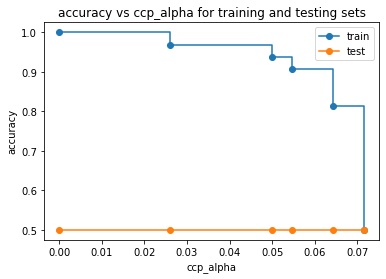

In [30]:
# decision tree hyperparameter tuning: ccp_alpha
# tune the cost complexity pruning parameter ccp_alpha
# to improve model accuracy

path = DT.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=1234)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_scores = []
test_scores = []
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs ccp_alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [31]:
# decision tree hyperparameter tuning
# 5-fold cross-validation: GridSearch
# assess model performance for different hyperparameter combinations

from sklearn.model_selection import GridSearchCV
param_grid = {
    'ccp_alpha': [0.00, 0.01, 0.02], #cost complexity pruning parameter alpha
    'max_depth': [None, 1, 2, 3, 5, 7, 9], #maximum depth of the tree
    'min_samples_split': [1, 2, 3, 5, 7], #minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], #minimum samples required in a leaf node
    'criterion': ['gini', 'entropy'] #splitting criterion
}
grid_search = GridSearchCV(estimator=DT, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
DT_best_params = grid_search.best_params_
DT_best_model = grid_search.best_estimator_
print("DT_best_params:", DT_best_params, "\n")
print("DT_best_model:", DT_best_model)

DT_best_params: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2} 

DT_best_model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')


In [32]:
# use the best hyperparameters to rebuild the decision tree model
DT = DT_best_model

In [33]:
# make predictions from the test data using the trained decision tree model
DT_y_pred = DT.predict(X_test)
print("DT_y_pred:", DT_y_pred)

DT_y_pred: [ 1.  1.  1.  1. -1.  1. -1.  1.]


In [34]:
# investigate feature importance of the trained decision tree model
# Gini importance scores: the importance of each feature at each split
DT_feature_importances = DT.feature_importances_
print("DT_feature_importances:", DT_feature_importances)

DT_feature_importances: [0.16666667 0.0462963  0.33366402 0.31001984 0.14335317 0.
 0.         0.         0.        ]


##### Decision Tree Model Summary:

I built a decision tree model (DT) and then done hyperparameter tuning for ccp_alpha, its cost complexity pruning parameter and a 5-fold cross-validation using GridSearchCV to select the best hyperparameter combinations to optimize its accuracy. Then I fitted the training dataset to the best DT model:
1. From the 'accuracy vs ccp_alpha for training and testing sets' plot, we can tell that the best ccp_alpha is 0.00, which was confirmed by DT_best_params, an output of GridSearchCV.
2. DT_best_params: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
3. DT_best_model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

The model was tested using the test data set, which generated the predicted values that will be used in the model evaluation section later:
4. DT_y_pred: [ 1.  1.  1.  1. -1.  1. -1.  1.]

I also inspected feature importance of the model, and found out that its most important features are:
5. 'Waketime' and 'Bedtime Temp' with Gini importance scores (the importance of the feature at each split) about 0.33 and 0.31 respectively, which are much higher than all other features.

#### 3. Adaboost Model

In [35]:
# build and train an adaboost model using the trained, hyperparameter-tuned DT as its base learner
from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier(base_estimator=DT, random_state=1234)

In [36]:
# adaboost hyperparameter tuning
# 5-fold cross-validation: GridSearch
# assess model performance for different hyperparameter combinations
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 100], #number of weak learners (Decision Trees)
    'learning_rate': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(estimator=AdaB, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
AdaB_best_params = grid_search.best_params_
AdaB_best_model = grid_search.best_estimator_
print("AdaB_best_params:", AdaB_best_params, "\n")
print("AdaB_best_model:", AdaB_best_model)

AdaB_best_params: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 10} 

AdaB_best_model: AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
 

In [37]:
# use the best hyperparameters to rebuild the adaboost model
AdaB = AdaB_best_model

In [38]:
# make predictions from the test data using the trained adaboost model
AdaB_y_pred = AdaB.predict(X_test)
print("AdaB_y_pred:", AdaB_y_pred)

AdaB_y_pred: [ 1.  1.  1. -1.  1.  1.  1.  1.]


In [39]:
# investigate feature importance of the trained adaboost model
# Gini importance scores: the importance of each feature at each split
AdaB_feature_importances = AdaB.feature_importances_
print("DT_feature_importances:", AdaB_feature_importances)

DT_feature_importances: [1.48061714e-01 7.80556668e-02 3.82046676e-01 2.36805564e-01
 1.19602324e-01 1.31266273e-02 2.41221718e-05 2.22773056e-02
 0.00000000e+00]


##### Adaboost Model Summary:
I built an adaboost model (AdaB) and then done a 5-fold cross-validation using GridSearchCV to select the best hyperparameter combinations to optimize its accuracy. Then I fitted the training dataset to the best AdaB model:
1. AdaB_best_params: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 10} 
2. AdaB_best_model: AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DT, #the decision tree model I built and optimized
                   learning_rate=1.0, n_estimators=10, random_state=1234)

The model was tested using the test data set, which generated the predicted values that will be used in the model evaluation section later:
3. AdaB_y_pred: [ 1.  1.  1. -1.  1.  1.  1.  1.]

I also inspected feature importance of the model, and found out that its most important feature is:
4. 'Waketime' with Gini importance scores (the importance of the feature at each split) about 0.38, which is the highest among and much higher than all other features.

#### 4. Random Forest Model

In [40]:
# build and train a random forest model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=1234)
print(RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)


In [41]:
# random forest hyperparameter tuning
# 5-fold cross-validation: GridSearch
# assess model performance for different hyperparameter combinations

param_grid = {
    'n_estimators': [150, 200, 250], #number of trees in the forest (Decision Tree)
    'max_depth': [1, 3, 5], #maximum depth of each tree
    'min_samples_split': [1, 2, 3], #minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 3], #minimum samples required in a leaf node
    'criterion': ['gini', 'entropy'] #splitting criterion
}

grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
RF_best_params = grid_search.best_params_
RF_best_model = grid_search.best_estimator_
print("RF_best_params:", RF_best_params, "\n")
print("RF_best_model:", RF_best_model)

RF_best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150} 

RF_best_model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)


In [42]:
# use the best hyperparameters to rebuild the random forest model
RF = RF_best_model

In [43]:
# make predictions from the test data using the trained random forest model
RF_y_pred = RF.predict(X_test)
print("RF_y_pred:", RF_y_pred)

RF_y_pred: [-1.  1.  1. -1. -1.  1. -1. -1.]


In [44]:
# investigate feature importance of the trained random forest model
# Gini importance scores: the importance of each feature at each split
RF_feature_importances = RF.feature_importances_
print("RF_feature_importances:", RF_feature_importances)

RF_feature_importances: [0.18316057 0.14934339 0.19948853 0.22026608 0.09156831 0.05076202
 0.03793533 0.03616324 0.03131254]


##### Random Forest Model Summary:
I built a random forest model (RF) and then done a 5-fold cross-validation using GridSearchCV to select the best hyperparameter combinations to optimize its accuracy. Then I fitted the training dataset to the best RF model:
1. RF_best_params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
2. RF_best_model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

The model was tested using the test data set, which generated the predicted values that will be used in the model evaluation section later:
3. RF_y_pred: [-1.  1.  1. -1. -1.  1. -1. -1.]

I also inspected feature importance of the model, and found out that its most important features are:
4. 'Bedtime Temp,''Waketime,' and 'Day' with Gini importance scores (the importance of the feature at each split) about 0.22, 0.20, 0.18 respectively, which are much higher than all other features.

#### 5. Support Vector Machine Model

In [45]:
# build and train a support vector machine model
from sklearn.svm import SVC
SVM = SVC(random_state=1234, probability=True)
print(SVM)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)


In [46]:
# support vector machine hyperparameter tuning
# 5-fold cross-validation: GridSearch
# assess model performance for different hyperparameter combinations

param_grid = {
    'C': [10, 20, 30],       #regularization parameter
    'kernel': ['linear', 'rbf'],  #kernel type
    'gamma': ['auto', 0.00001, 0.0001, 0.001]  #kernel coefficient for 'rbf'
}

grid_search = GridSearchCV(estimator=SVM, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
SVM_best_params = grid_search.best_params_
SVM_best_model = grid_search.best_estimator_
print("SVM_best_params:", SVM_best_params, "\n")
print("SVM_best_model:", SVM_best_model)

SVM_best_params: {'C': 10, 'gamma': 'auto', 'kernel': 'linear'} 

SVM_best_model: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)


In [47]:
# use the best hyperparameters to rebuild the support vector machine model
SVM = SVM_best_model

In [48]:
# make predictions from the test data using the trained support vector machine model
SVM_y_pred = SVM.predict(X_test)
print("SVM_y_pred:", SVM_y_pred)

SVM_y_pred: [-1.  1.  1. -1.  1.  1. -1.  1.]


In [49]:
# investigate feature importance of the trained support vector machine model
coefficients = SVM.coef_[0]

selected_feature_columns = ['Day', 'Bedtime', 'Waketime', 'Bedtime Temp', 
                            'Perceived Temp', 'Dream', 'Wake Freq', 'Waked by Wife', 'Wife Nocturia']
feature_names = sleepdata[selected_feature_columns]

SVM_feature_importances = list(zip(feature_names, coefficients))
SVM_feature_importances.sort(key=lambda x: abs(x[1]), reverse=True)

print("SVM_feature_importances:")
for feature, coef in SVM_feature_importances:
    print(f"{feature}:{coef}")

SVM_feature_importances:
Dream:5.320083883049152
Waked by Wife:-1.300727360878609
Perceived Temp:0.9535587886809189
Wife Nocturia:0.6639640341059101
Waketime:-0.5710103458234599
Bedtime:0.4070085951609457
Bedtime Temp:-0.3173587041180781
Wake Freq:-0.2788848040998477
Day:-0.2768599738535453


##### Support Vector Machine Model Summary:

I built a support vector machine model (SVM) and then done a 5-fold cross-validation using GridSearchCV to select the best hyperparameter combinations to optimize its accuracy. Then I fitted the training dataset to the best LG model: <br>
1. SVM_best_params: {'C': 10, 'gamma': 'auto', 'kernel': 'linear'} 
2. SVM_best_model: SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=1234, shrinking=True, tol=0.001,
    verbose=False)

The model was tested using the test data set, which generated the predicted values that will be used in the model evaluation section later:  
3. SVM_y_pred: [-1.  1.  1. -1.  1.  1. -1.  1.]

I also inspected feature importance of the model, and found out that its most important feature is:
4. 'Dream,' with a coefficient of about 5.32, the highest among and very much higher than all other features.

### V. Analysis Result: Model Performance Evaluation and Comparision

In this section, I will evaluate and compare the performance of the five supervised machine learning models I built for this binary class classification project in the last section, using the following evaluation metrics:
1. confusion matrix: to find out the numbers of true negatives (TN), false positives(FP), false negatives (FN), and true positives (TP) in the data, which provides details and context for other related evaluation metrics;
2. accuracy: to measure the overall correctness of prediction, which is of good reference value since our data is well-balanced
3. F1-score: to find a harmonic mean of two other common evaluation metrics, precision and recall, which is rather robust
4. AUC score (visualized in the ROC-AUC plot): to assess a model's ability of correctly classifying positive and negative classes across different probability thresholds, which is the most important evaluation metric for the binary classification models built in this project

Thus, I will rate a model's performace with differnt weights of the evaluation metrics above, from highest to lowest, namely AUC score, accuracy, and F1-score. While, the details in their confusion matrix only serve as a reference. <br>

I did not iterate the training and evaluation process to select features in this section, because I had done hyperparamter tuning and best hyperparmeter combination selection (using GridSearchCV) to optimize model performance in the last section. Features are automatically selected by the models themselves.

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report

#### 1. Evaluation of the Logistic Model, LG

In [51]:
print("\nClassification Report - the Logistic Regression Model, LG:")
print(classification_report(y_test, LG_y_pred))


Classification Report - the Logistic Regression Model, LG:
              precision    recall  f1-score   support

        -1.0       0.67      0.50      0.57         4
         1.0       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



In [52]:
# confusion matrix of LG
LG_confusionMatrix = confusion_matrix(y_test, LG_y_pred)
print("LG_confusionMatrix:", LG_confusionMatrix, "\n")

# true negatives (TN), false positives(FP), false negatives (FN), true positives (TP) of LG
TN, FP, FN, TP = LG_confusionMatrix.ravel()
print("number of true negatives of LG:", TN)
print("number of true positives of LG:", TP)
print("number of false negatives of LG:", FN)
print("number of false positives of LG:", FP)

# false positive rate of LG
# false positive rate = FP / total negatives = FP / (FP+TN)
LG_fpr = FP/(FP+TN)
print("LG false positive rate:", LG_fpr*100, "%")

# false negative rate of LG
# false negative rate = FN / total positives = FN / (TP+FN)
LG_fnr = FP/(TP+FN)
print("LG false negative rate:", LG_fnr*100, "%")

LG_confusionMatrix: [[2 2]
 [1 3]] 

number of true negatives of LG: 2
number of true positives of LG: 3
number of false negatives of LG: 1
number of false positives of LG: 2
LG false positive rate: 50.0 %
LG false negative rate: 50.0 %


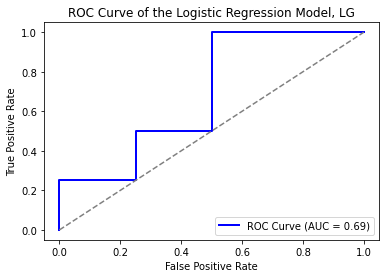

In [53]:
# ROC-AUC plot of LG
LG_y_pred_prob = LG.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, LG_y_pred_prob)
roc_auc = roc_auc_score(y_test, LG_y_pred_prob)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Logistic Regression Model, LG')
plt.legend(loc='lower right')
plt.show()

#### 2. Evaluation of the Decision Tree Model, DT

In [54]:
print("\nClassification Report - the Decision Tree Model, DT:")
print(classification_report(y_test, DT_y_pred))


Classification Report - the Decision Tree Model, DT:
              precision    recall  f1-score   support

        -1.0       0.50      0.25      0.33         4
         1.0       0.50      0.75      0.60         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



In [55]:
# confusion matrix of DT
DT_confusionMatrix = confusion_matrix(y_test, DT_y_pred)
print("DT_confusionMatrix:", DT_confusionMatrix, "\n")

# true negatives (TN), false positives(FP), false negatives (FN), true positives (TP) of DT
TN, FP, FN, TP = DT_confusionMatrix.ravel()
print("number of true negatives of DT:", TN)
print("number of true positives of DT:", TP)
print("number of false negatives of DT:", FN)
print("number of false positives of DT:", FP)

# false positive rate of DT
# false positive rate = FP / total negatives = FP / (FP+TN)
DT_fpr = FP/(FP+TN)
print("DT false positive rate:", DT_fpr*100, "%")

# false negative rate of DT
# false negative rate = FN / total positives = FN / (TP+FN)
DT_fnr = FP/(TP+FN)
print("DT false negative rate:", DT_fnr*100, "%")

DT_confusionMatrix: [[1 3]
 [1 3]] 

number of true negatives of DT: 1
number of true positives of DT: 3
number of false negatives of DT: 1
number of false positives of DT: 3
DT false positive rate: 75.0 %
DT false negative rate: 75.0 %


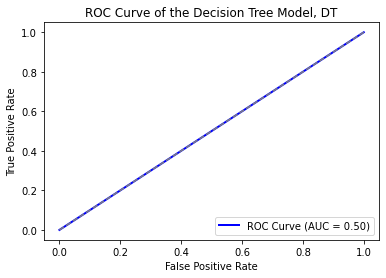

In [56]:
# ROC-AUC plot of DT
DT_y_pred_prob = DT.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, DT_y_pred_prob)
roc_auc = roc_auc_score(y_test, DT_y_pred_prob)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Decision Tree Model, DT')
plt.legend(loc='lower right')
plt.show()

#### 3. Evaluation of the Adaboost Model, AdaB

In [57]:
print("\nClassification Report - the Adaboost Mode, AdaB:")
print(classification_report(y_test, AdaB_y_pred))


Classification Report - the Adaboost Mode, AdaB:
              precision    recall  f1-score   support

        -1.0       1.00      0.25      0.40         4
         1.0       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



In [58]:
# confusion matrix of AdaB
AdaB_confusionMatrix = confusion_matrix(y_test, AdaB_y_pred)
print("AdaB_confusionMatrix:", AdaB_confusionMatrix, "\n")

# true negatives (TN), false positives(FP), false negatives (FN), true positives (TP) of DT
TN, FP, FN, TP = AdaB_confusionMatrix.ravel()
print("number of true negatives of AdaB:", TN)
print("number of true positives of AdaB:", TP)
print("number of false negatives of AdaB:", FN)
print("number of false positives of AdaB:", FP)

# false positive rate of AdaB
# false positive rate = FP / total negatives = FP / (FP+TN)
AdaB_fpr = FP/(FP+TN)
print("AdaB false positive rate:", AdaB_fpr*100, "%")

# false negative rate of DT
# false negative rate = FN / total positives = FN / (TP+FN)
AdaB_fnr = FP/(TP+FN)
print("AdaB false negative rate:", AdaB_fnr*100, "%")

AdaB_confusionMatrix: [[1 3]
 [0 4]] 

number of true negatives of AdaB: 1
number of true positives of AdaB: 4
number of false negatives of AdaB: 0
number of false positives of AdaB: 3
AdaB false positive rate: 75.0 %
AdaB false negative rate: 75.0 %


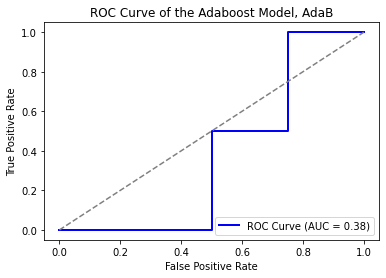

In [59]:
# ROC-AUC plot of AdaB
AdaB_y_pred_prob = AdaB.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, AdaB_y_pred_prob)
roc_auc = roc_auc_score(y_test, AdaB_y_pred_prob)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Adaboost Model, AdaB')
plt.legend(loc='lower right')
plt.show()

#### 4. Evaluation of the Random Forest Model, RF

In [60]:
print("\nClassification Report - the Random Forest Model, RF:")
print(classification_report(y_test, RF_y_pred))


Classification Report - the Random Forest Model, RF:
              precision    recall  f1-score   support

        -1.0       0.40      0.50      0.44         4
         1.0       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



In [61]:
# confusion matrix of RF
RF_confusionMatrix = confusion_matrix(y_test, RF_y_pred)
print("RF_confusionMatrix:", RF_confusionMatrix, "\n")

# true negatives (TN), false positives(FP), false negatives (FN), true positives (TP) of DT
TN, FP, FN, TP = RF_confusionMatrix.ravel()
print("number of true negatives of RF:", TN)
print("number of true positives of RF:", TP)
print("number of false negatives of RF:", FN)
print("number of false positives of RF:", FP)

# false positive rate of RF
# false positive rate = FP / total negatives = FP / (FP+TN)
RF_fpr = FP/(FP+TN)
print("RF false positive rate:", RF_fpr*100, "%")

# false negative rate of DT
# false negative rate = FN / total positives = FN / (TP+FN)
RF_fnr = FP/(TP+FN)
print("RF false negative rate:", RF_fnr*100, "%")

RF_confusionMatrix: [[2 2]
 [3 1]] 

number of true negatives of RF: 2
number of true positives of RF: 1
number of false negatives of RF: 3
number of false positives of RF: 2
RF false positive rate: 50.0 %
RF false negative rate: 50.0 %


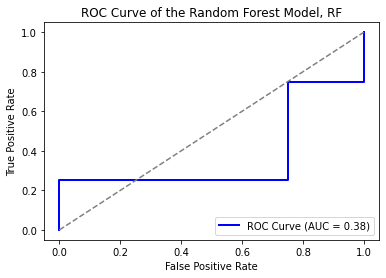

In [62]:
# ROC-AUC plot of RF
RF_y_pred_prob = RF.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, RF_y_pred_prob)
roc_auc = roc_auc_score(y_test, RF_y_pred_prob)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Random Forest Model, RF')
plt.legend(loc='lower right')
plt.show()

#### 5. Evaluation of the Support Vector Machine Model, SVM

In [63]:
print("\nClassification Report - the Support Vector Machine Model, SVM:")
print(classification_report(y_test, SVM_y_pred))


Classification Report - the Support Vector Machine Model, SVM:
              precision    recall  f1-score   support

        -1.0       0.67      0.50      0.57         4
         1.0       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



In [64]:
# confusion matrix of SVM
SVM_confusionMatrix = confusion_matrix(y_test, SVM_y_pred)
print("SVM_confusionMatrix:", SVM_confusionMatrix, "\n")

# true negatives (TN), false positives(FP), false negatives (FN), true positives (TP) of DT
TN, FP, FN, TP = SVM_confusionMatrix.ravel()
print("number of true negatives of SVM:", TN)
print("number of true positives of SVM:", TP)
print("number of false negatives of SVM:", FN)
print("number of false positives of SVM:", FP)

# false positive rate of SVM
# false positive rate = FP / total negatives = FP / (FP+TN)
SVM_fpr = FP/(FP+TN)
print("SVM false positive rate:", SVM_fpr*100, "%")

# false negative rate of DT
# false negative rate = FN / total positives = FN / (TP+FN)
SVM_fnr = FP/(TP+FN)
print("SVM false negative rate:", SVM_fnr*100, "%")

SVM_confusionMatrix: [[2 2]
 [1 3]] 

number of true negatives of SVM: 2
number of true positives of SVM: 3
number of false negatives of SVM: 1
number of false positives of SVM: 2
SVM false positive rate: 50.0 %
SVM false negative rate: 50.0 %


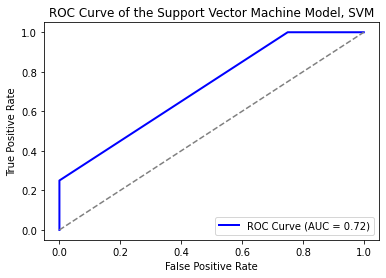

In [65]:
# ROC-AUC plot of SVM
SVM_y_pred_prob = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, SVM_y_pred_prob)
roc_auc = roc_auc_score(y_test, SVM_y_pred_prob)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of the Support Vector Machine Model, SVM')
plt.legend(loc='lower right')
plt.show()

##### Model Performance Comparison Summary:

The five models' score for the selected evaluation metrics are:
1. logistic regression model (LG): AUC 0.69, accuracy 0.62, F1 0.62
2. decision tree model (DT): AUC 0.50, accuracy 0.50, F1 0.47
3. adaboost model (AdaB): AUC 0.38, accuracy 0.62, F1 0.56
4. random forest model (RF): AUC 0.38, accuracy 0.38, F1 0.37
5. support vector machine model (SVM): AUC 0.72, accuracy 0.62, F1 0.62

Therefore, we can conclude that the model with best binary class classification performance is the support vector machine model, SVM. It has the highest AUC score, accuracy, and F1-score. 

The other models with performance from the best to the worst are: LG, AdaB, DT, and RF.

### VI. Discussion and Conclusion

Since I have identified SVM as the best performing model for this project, I will make some predictions using a few rows of new record the subject has collected recently to see how well the model works. These data are reasonable (collected using the same features and standards by the same subject), unseen, new data that are not in the test set.

In [66]:
# make predictions from reasonable, unseen, new data (not in the test set either)
# sugested by the subject
# using the model with the best prediction performance
import numpy as np
x_new1 = [[1, 22.5, 4.5, 31, 3, 2, 0, 3, 2]]
y_new1 = 1 #sleep quality level 5
SVM_y_pred_new1 = SVM.predict(x_new1)
print("new data X_new1:", x_new1)
print("new data should be labelled as:", y_new1)
print("SVM prediction of the new data X_new1:", SVM_y_pred_new1, "\n")


x_new2 = [[2, 22.58, 6.08, 30.9, 1, 1, 0, 3, 2]]
y_new2 = -1 #sleep quality level 4
SVM_y_pred_new2 = SVM.predict(x_new2)
print("new data X_new2:", x_new2)
print("new data should be labelled as:", y_new2)
print("SVM prediction of the new data X_new2:", SVM_y_pred_new2, "\n")

x_new3 = [[3, 23.43, 6.53, 30.2, 3, 2, 0, 3, 2]]
y_new3 = 1 #sleep quality level 5
SVM_y_pred_new3 = SVM.predict(x_new3)
print("new data X_new3:", x_new3)
print("new data should be labelled as:", y_new3)
print("SVM prediction of the new data X_new3:", SVM_y_pred_new3, "\n")

x_new4 = [[4, 24, 7, 31.35, 3, 2, 0, 3, 2]]
y_new4 = -1 #sleep quality level 4
SVM_y_pred_new4 = SVM.predict(x_new4)
print("new data X_new4:", x_new4)
print("new data should be labelled as:", y_new4)
print("SVM prediction of the new data X_new1:", SVM_y_pred_new4)

new data X_new1: [[1, 22.5, 4.5, 31, 3, 2, 0, 3, 2]]
new data should be labelled as: 1
SVM prediction of the new data X_new1: [1.] 

new data X_new2: [[2, 22.58, 6.08, 30.9, 1, 1, 0, 3, 2]]
new data should be labelled as: -1
SVM prediction of the new data X_new2: [-1.] 

new data X_new3: [[3, 23.43, 6.53, 30.2, 3, 2, 0, 3, 2]]
new data should be labelled as: 1
SVM prediction of the new data X_new3: [1.] 

new data X_new4: [[4, 24, 7, 31.35, 3, 2, 0, 3, 2]]
new data should be labelled as: -1
SVM prediction of the new data X_new1: [1.]


##### Tried Out the Prediction Power of the SVM Model with New, Unseen Data:

It turns out that SVM only made one wrong prediction (for X_new4) among the four rounds of prediction experiments! This indeed boosted my confidence in the predictive power of the model.

##### Conclusion:

To conclude, the answers to my questions for this project are: <br>
1. Which features are correlated? How? <br>
Ans: The features that are correlated are 'Waketime' and 'Sleep Length' (with a positive correlation 0.53), 'Bedtime' and 'Sleep Length' (with a negative correlation -0.75), and 'Sleep Quality Level' and 'Slept Well' (with a positive correlation 0.79).


2. Which features are important in the prediction of the subject's sleep quality? Why?  <br>
Ans: In the first two best performing model, the feature most important in the prediction of the subject's sleep quality is 'Dream' (with an coefficient of 5.32 and 6.47, respectively).


3. Which model, logistic regression, decision tree, adaboost, random forest, or support vector machine, turns out to be the best model for this binary class classification task? Why?  <br>
Ans: The best performing model is the support vector model, SVM. It has the highest AUC score (0.72), accuracy (0.62), and F1-score (0.62).


4. How well do the best-performing model predict the subject's sleep quality?  <br>
Ans: It has an AUC score of 0.72, a accuracy of 0.62, and a F1-score of 0.62. Besides, it only made one wrong prediction (for X_new4) among the four rounds of prediction experiments conducted above.

##### Discussion:

What are the limitations of this project? How can I further improve it? <br>

The dataset was collected by a lay-person who did not have any domian knowlege about factors that would influence sleep quality. The sleep quality level was also self-assigned by the subject without a scientific rubric. Therefore, the features in this dataset are probably not inclusive. If I were to conduct this project again, I would find out the features to be recorded and their weights in terms of their influence over sleep quality based on published research articles. <br>

Besides, due to my limited knowledge of machine learning, I could only build the models I have studied. There could be other models that suit this binary classification task better, as well as other techniques that can enhance model performance.This is my very first machine learning project. Hopefully I would be able to dive deeper into this field and improve my modelling skills to better optimize this kind of models.